# Class Exercises - Week 4

---
---

**Author:** Dr Giordano Scarciotti (g.scarciotti@imperial.ac.uk) - Imperial College London

**Module:** ELEC70066 - Applied Advanced Optimisation

**Version:** 1.1.2 - 29/01/2025

---
---

**Reminder:** The solutions of some these exercises may be found online. Do not look for the solutions, but ask for help to me or the GTA. Your assessment will not have a solution available online so it is of paramount importance that you learn how to solve the problems without relying on a solution being available.

The solutions of these exercises will be discussed at the end of the session. Moreover, the complete solution will be provided to you after 1 week.  **N.B.** **Do not share the solutions online**

## Exercise 1

In a *Boolean linear program* (LP), the variable $x$ is constrained to have components equal to zero or one

$$
\begin{array}{ll}
\displaystyle \min_{x} &  c^\top x \\
\text{s.t. } & Ax \preccurlyeq b,\\
& x_i\in \{0, 1\}, \qquad i = 1, \dots, n.\tag{1}
\end{array}
$$

You can think of $x_i$ as a job we either accept or decline, and $−c_i$ as the (positive) revenue we generate if we accept job $i$. We can think of $Ax \preccurlyeq b$ as a set of limits on $m$ resources. $A_{ij}$, which is positive, is the amount of resource $i$ consumed if we accept
job $j$; $b_i$, which is positive, is the amount of resource $i$ available.

In general, such problems are very difficult to solve, even though the feasible set is finite (containing at most $2^n$ points).

A standard approximation method to solve a Boolean LP is the so-called *relaxation*: the constraint that $x_i$ must be zero or one is replaced with the linear inequalities $0 \le x_i \le 1$, namely

$$
\begin{array}{ll}
\displaystyle \min_{x} &  c^\top x \\
\text{s.t. } & Ax \preccurlyeq b,\\
& 0 \le x_i \le 1, \qquad i = 1, \dots, n. \tag{2}
\end{array}
$$

We refer to this problem as the *LP relaxation* of the Boolean LP $(1)$. The LP relaxation is far easier to solve than the original Boolean LP.

We call $p_B^*$ the optimal value of $(1)$ associated to the solution $x_B$ and $p_r^*$ the optimal value of $(2)$ associated to the solution $x_r$.

The prolem data is generated by the code below.

In [1]:
import cvxpy as cp
import numpy as np

n = 100
m = 300
np.random.seed(1)
A = np.random.random((m, n)) # positve
b = np.dot(A,np.ones(n)/2) # postive
c = -np.random.random(n) # negative, so -c is positive

*   What can you say about the Boolean problem $(1)$ if the relaxation $(2)$ is infeasible?
*   Explain why $p_r^*$ is a lower bound on $p_B^*$.
*   If the solution of the LP relaxation is such that $x_{r,i}\in \{0,1\}$ for all $i$, what can you say in this case?
*   Find a solution in CVXPY of the relaxed problem and examine its entries. Note the associated lower bound as $L = p_r^*$.

(1) is not a convex problem. 
1. If (2) is infeasible, then (1) must also be infeasible. 
2. Because (2) has a bigger domain, while containing all the points in (1)?
3. In that case (2) would be the exact same problem and solution as (1).

In [7]:
xr = cp.Variable(n)
objective = cp.Minimize(c @ xr)
constraints = [
    A @ xr <= b, 
    xr <= 1,
    xr >= 0
]
problem = cp.Problem(objective, constraints)
problem.solve()
print(problem.value)
# print(xr.value)

-34.589711317650256


## Exercise 2

This exercise is a follow up to Exercise $1$. We use the same notation and data.

The relaxed solution $x_r$ can be used to guess a Boolean point $\hat x$ by rounding its entries based on a threshold $t \in [0,1]$:

$$
\hat x_i = \left\{ \begin{array}{ll} 1 & x_r \ge t \\ 0 & \text{otherwise} \end{array} \right.
$$

for $i = 1,\dots, n$. 

If $\hat x$ is feasible for the Boolean problem $(1)$, i.e., if $A\hat x \preccurlyeq b$, then it can be considered a guess at a good point for the Boolean problem. Its objective value, $U = c^\top \hat{x}$, is an upper bound on $p_B^*$. If $U$ and $L$ are close, then $\hat{x}$ is nearly optimal; specifically, $\hat{x}$ cannot be more than
$(U − L)$-suboptimal for the Boolean problem.

Carry out threshold rounding for $100$ values of $t$, uniformly spaced over
$[0, 1]$.

*    For each value of $t$, note the objective value $c^\top \hat{x}$ and the maximum constraint violation $\max_i(A\hat{x} − b)_i$. Plot (in two different figures) the objective value and the maximum violation versus $t$. Be sure to indicate (e.g. with two colours) on the plot the values for which $\hat x$ is feasible, and those for which it is not.
*    Find all values of $t$ for which $\hat{x}$ is feasible and gives minimum objective value, and note the associated upper bound $U$. Give the gap $U − L$ between the upper bound on $p_B^*$ and the lower bound on $p_B^*$. Compute the relative suboptimality percentage as $\frac{|U-L|}{|L|} \times 100$.

feasible indices: [0.494949494949495, 0.5050505050505051, 0.5151515151515152, 0.5252525252525253, 0.5353535353535354, 0.5454545454545455, 0.5555555555555556, 0.5656565656565657, 0.5757575757575758, 0.5858585858585859, 0.595959595959596, 0.6060606060606061, 0.6161616161616162, 0.6262626262626263, 0.6363636363636365, 0.6464646464646465, 0.6565656565656566, 0.6666666666666667, 0.6767676767676768, 0.686868686868687, 0.696969696969697, 0.7070707070707072, 0.7171717171717172, 0.7272727272727273, 0.7373737373737375, 0.7474747474747475, 0.7575757575757577, 0.7676767676767677, 0.7777777777777778, 0.787878787878788, 0.797979797979798, 0.8080808080808082, 0.8181818181818182, 0.8282828282828284, 0.8383838383838385, 0.8484848484848485, 0.8585858585858587, 0.8686868686868687, 0.8787878787878789, 0.888888888888889, 0.8989898989898991, 0.9090909090909092, 0.9191919191919192, 0.9292929292929294, 0.9393939393939394, 0.9494949494949496, 0.9595959595959597, 0.9696969696969697, 0.9797979797979799, 0.989898

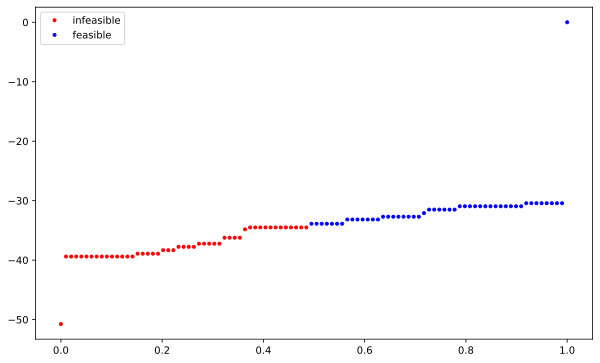

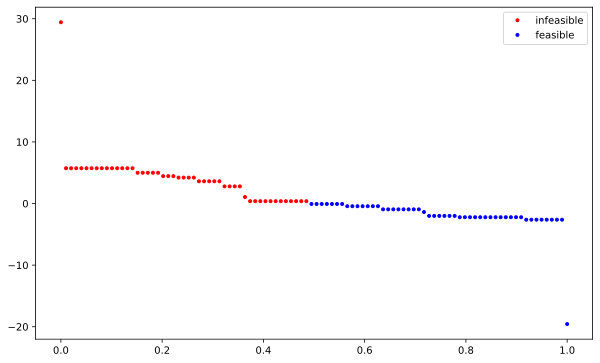

L: -34.589711317650256
U: -33.88368852196696
suboptimality percentage: 2.0411352647601615 %


In [38]:
# part 1
t_values = np.linspace(0, 1, 100)
xi = []
objective_values = []
max_violations = []
feasible_indices = []

for t in t_values:
    xi_hat = np.where(xr.value >= t, 1, 0)
    xi.append(xi_hat)
    
    objective_values.append(c @ xi_hat)

    violation = np.max(A @ xi_hat - b)
    max_violations.append(violation)

    if max_violations[-1] <= 0:
        feasible_indices.append(t)

print('feasible indices:', feasible_indices)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6), label = 'objective values')
feasible_mask = np.array([violation <= 0 for violation in max_violations])
plt.plot(t_values[~feasible_mask], np.array(objective_values)[~feasible_mask], 'r.', label='infeasible')
plt.plot(t_values[feasible_mask], np.array(objective_values)[feasible_mask], 'b.', label='feasible')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6), label = 'max violations')
plt.plot(t_values[~feasible_mask], np.array(max_violations)[~feasible_mask], 'r.', label='infeasible')
plt.plot(t_values[feasible_mask], np.array(max_violations)[feasible_mask], 'b.', label='feasible')
plt.legend()
plt.show()

# print(feasible_mask)

# part 2
feasible_objective_values = np.array(objective_values)[feasible_mask]
feasible_xi = np.array(xi)[feasible_mask]
max_index = np.argmax(feasible_objective_values)
min_index = np.argmin(feasible_objective_values)
L = problem.value
U = feasible_objective_values[min_index]
print('L:', L)
print('U:', U)
suboptimality_percentage = np.abs(U - L) / np.abs(L) * 100
print('suboptimality percentage:', suboptimality_percentage, '%')

## Exercise 3

For each of the following functions determine whether it is convex, concave or neither.

1.   $f(x) = e^x -1$ on $\mathbb{R}$.
2.   $f(x_1,x_2) = x_1 x_2$ on $\mathbb{R}^2_{++}$.
3.   $f(x_1,x_2) = \frac{1}{x_1 x_2}$ on $\mathbb{R}^2_{++}$.
4.   $f(x_1,x_2) = \frac{x_1}{x_2}$ on $\mathbb{R}^2_{++}$.
5.   $f(x_1,x_2) = \frac{x_1^2}{x_2}$ on $\mathbb{R} \times \mathbb{R}_{++}$.
6.   $f(x_1,x_2) = x_1^{\alpha} x_2^{1-\alpha}$, where $0\le \alpha\le 1$, on $\mathbb{R}^2_{++}$.